# TCC - BASE 3 - Regressão
===================================================================================================================

Avaliação de técnicas de predição na determinação de preços de bens industriais - TCC

Alunos: Adriano Gonçalves da Silva / Fernando Nahid Leitão / Leonardo Carmo de Holanda

Matrícula: 192.671.008 / 192.671.055 / 192.671.058

E-mail: adrianogo@yahoo.com.br / fernando_nahid@hotmail.com / carmodeholanda@gmail.com

===================================================================================================================

## <font color='blue'>Pré-processamento</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [66]:
import nltk
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import scale
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt
import seaborn as sns

import graphs

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE1_ETAPA3_v1.csv*

In [67]:
plt.rcParams['figure.figsize'] = [12, 8]
data = pd.read_csv('BASE3_ETAPA3_v1.csv', encoding="ISO-8859-1", nrows=None, sep=';')
data.head()

CLASSE_FLANGE    NPSH SELAGEM  ... VAZAO   id VALOR_REFERENCIA
0        NENHUM  NENHUM  NENHUM  ...   4.5  1.0         13459.10
1        NENHUM  NENHUM  NENHUM  ...   4.5  2.0         13459.10
2        NENHUM  NENHUM  NENHUM  ...  17.0  3.0         16174.10
3        NENHUM  NENHUM  NENHUM  ...  17.0  4.0         34587.23
4        NENHUM  NENHUM  NENHUM  ...  20.0  5.0         29867.99

[5 rows x 23 columns]

*Análise exploratória da base*

In [68]:
data.shape

(324, 23)

In [69]:
data.columns

Index(['CLASSE_FLANGE', 'NPSH', 'SELAGEM', 'TEMPERATURA_OPER', 'ACIONADOR',
       'AREA_APLICA', 'CERTIF_CONFORMIDADE', 'DIM_733', 'API_610', 'FLUIDO',
       'GRAU_PROTE', 'GRUPO_GASES', 'NORMA_PGBF', 'PROTE_CLASSIFICADA',
       'ESTAGIO', 'SELAGEM.1', 'PADRAO_CONSTRUTIVO', 'TIPO_BOMBA', 'ROTOR',
       'PRESSAO', 'VAZAO', 'id', 'VALOR_REFERENCIA'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLASSE_FLANGE        324 non-null    object 
 1   NPSH                 324 non-null    object 
 2   SELAGEM              324 non-null    object 
 3   TEMPERATURA_OPER     324 non-null    object 
 4   ACIONADOR            324 non-null    object 
 5   AREA_APLICA          324 non-null    object 
 6   CERTIF_CONFORMIDADE  324 non-null    object 
 7   DIM_733              324 non-null    object 
 8   API_610              324 non-null    object 
 9   FLUIDO               324 non-null    object 
 10  GRAU_PROTE           324 non-null    object 
 11  GRUPO_GASES          324 non-null    object 
 12  NORMA_PGBF           324 non-null    object 
 13  PROTE_CLASSIFICADA   324 non-null    object 
 14  ESTAGIO              324 non-null    int64  
 15  SELAGEM.1            324 non-null    obj

In [71]:
data.isnull().sum()

CLASSE_FLANGE          0
NPSH                   0
SELAGEM                0
TEMPERATURA_OPER       0
ACIONADOR              0
AREA_APLICA            0
CERTIF_CONFORMIDADE    0
DIM_733                0
API_610                0
FLUIDO                 0
GRAU_PROTE             0
GRUPO_GASES            0
NORMA_PGBF             0
PROTE_CLASSIFICADA     0
ESTAGIO                0
SELAGEM.1              0
PADRAO_CONSTRUTIVO     0
TIPO_BOMBA             0
ROTOR                  0
PRESSAO                0
VAZAO                  0
id                     0
VALOR_REFERENCIA       0
dtype: int64

## <font color='blue'>Tratamentos dos dados</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [72]:
data = data.drop(columns=['id'])

*Ajustes nos nomes das colunas*

In [73]:
data['SELAGEM_1'] = data['SELAGEM.1']
data = data.drop(['SELAGEM.1'], axis=1)

In [74]:
from sklearn.preprocessing import LabelEncoder
label_enconder = LabelEncoder()
labels_CLASSE_FLANGE = label_enconder.fit_transform(data.CLASSE_FLANGE)
data['classe_flange'] = labels_CLASSE_FLANGE
labels_NPSH = label_enconder.fit_transform(data.NPSH)
data['npsh'] = labels_NPSH
labels_SELAGEM = label_enconder.fit_transform(data.SELAGEM)
data['selagem'] = labels_SELAGEM
labels_TEMPERATURA_OPER = label_enconder.fit_transform(data.TEMPERATURA_OPER)
data['temp_oper'] = labels_TEMPERATURA_OPER
labels_ACIONADOR = label_enconder.fit_transform(data.ACIONADOR)
data['acionador'] = labels_ACIONADOR
labels_AREA_APLICA = label_enconder.fit_transform(data.AREA_APLICA)
data['area_aplica'] = labels_AREA_APLICA
labels_CERTIF_CONFORMIDADE = label_enconder.fit_transform(data.CERTIF_CONFORMIDADE)
data['certif_conformidade'] = labels_CERTIF_CONFORMIDADE
labels_DIM_733 = label_enconder.fit_transform(data.DIM_733)
data['dim_733'] = labels_DIM_733
labels_API_610 = label_enconder.fit_transform(data.API_610)
data['api_610'] = labels_API_610
labels_FLUIDO = label_enconder.fit_transform(data.FLUIDO)
data['fluido'] = labels_FLUIDO
labels_GRAU_PROTE = label_enconder.fit_transform(data.GRAU_PROTE)
data['grau_prote'] = labels_GRAU_PROTE
labels_GRUPO_GASES = label_enconder.fit_transform(data.GRUPO_GASES)
data['grupo_gases'] = labels_GRUPO_GASES
labels_NORMA_PGBF = label_enconder.fit_transform(data.NORMA_PGBF)
data['norma_pgbf'] = labels_NORMA_PGBF
labels_PROTE_CLASSIFICADA = label_enconder.fit_transform(data.PROTE_CLASSIFICADA)
data['prote_classifica'] = labels_PROTE_CLASSIFICADA
labels_SELAGEM_1 = label_enconder.fit_transform(data.SELAGEM_1)
data['selagem_1'] = labels_SELAGEM_1
labels_PADRAO_CONSTRUTIVO = label_enconder.fit_transform(data.PADRAO_CONSTRUTIVO)
data['padrao_construt'] = labels_PADRAO_CONSTRUTIVO
labels_TIPO_BOMBA = label_enconder.fit_transform(data.TIPO_BOMBA)
data['tipo_bomba'] = labels_TIPO_BOMBA
labels_ROTOR = label_enconder.fit_transform(data.ROTOR)
data['rotor'] = labels_ROTOR

In [75]:
data = data.drop(['CLASSE_FLANGE', 'NPSH', 'SELAGEM', 'TEMPERATURA_OPER', 'ACIONADOR', 'AREA_APLICA', 'CERTIF_CONFORMIDADE', 'DIM_733', 'API_610', 'FLUIDO', 'GRAU_PROTE', 'GRUPO_GASES', 'NORMA_PGBF', 'PROTE_CLASSIFICADA', 'PADRAO_CONSTRUTIVO', 'TIPO_BOMBA', 'ROTOR', 'SELAGEM_1'], axis=1)

In [76]:
data['VALOR'] = data['VALOR_REFERENCIA']
data = data.drop(['VALOR_REFERENCIA'], axis=1)

In [77]:
data.head()

ESTAGIO  PRESSAO  VAZAO  ...  tipo_bomba  rotor     VALOR
0        1     6.33    4.5  ...           0      1  13459.10
1        1     6.33    4.5  ...           0      1  13459.10
2       22     8.00   17.0  ...           2      4  16174.10
3        1     2.40   17.0  ...           2      2  34587.23
4        1     1.50   20.0  ...           0      2  29867.99

[5 rows x 22 columns]

*Visualização de histograma*

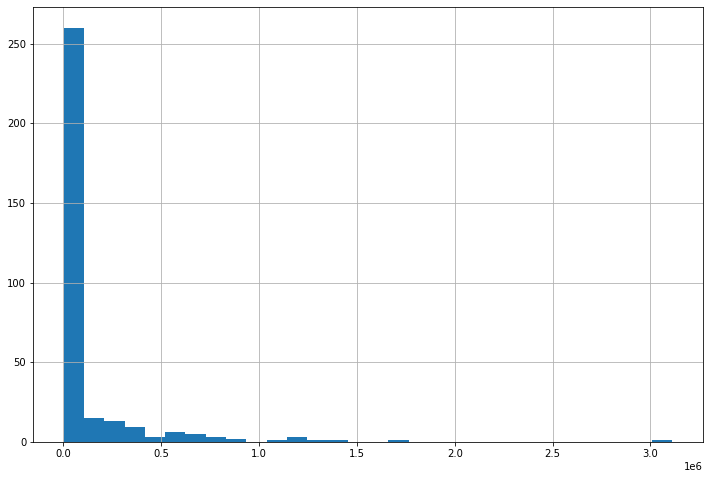

In [78]:
data['VALOR'].hist(bins = 30)

*Visualização da base*

In [79]:
data.head()

ESTAGIO  PRESSAO  VAZAO  ...  tipo_bomba  rotor     VALOR
0        1     6.33    4.5  ...           0      1  13459.10
1        1     6.33    4.5  ...           0      1  13459.10
2       22     8.00   17.0  ...           2      4  16174.10
3        1     2.40   17.0  ...           2      2  34587.23
4        1     1.50   20.0  ...           0      2  29867.99

[5 rows x 22 columns]

In [80]:
data.shape

(324, 22)

*Padronizar a base*

In [81]:
from sklearn.preprocessing import StandardScaler
data_cols = data.columns
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=data_cols)
data.head()

ESTAGIO   PRESSAO     VAZAO  ...  tipo_bomba     rotor     VALOR
0 -0.399334 -0.069553 -0.429946  ...   -0.831819 -0.665684 -0.367050
1 -0.399334 -0.069553 -0.429946  ...   -0.831819 -0.665684 -0.367050
2  9.167798  0.176500 -0.349750  ...    1.194567  0.924107 -0.357797
3 -0.399334 -0.648590 -0.349750  ...    1.194567 -0.135754 -0.295043
4 -0.399334 -0.781193 -0.330503  ...   -0.831819 -0.135754 -0.311127

[5 rows x 22 columns]

## <font color='blue'>Modelo de regressão múltipla linear</font>
===================================================================================================================

### <font color='green'>Análise de correlação</font>

*Matriz de correlação*

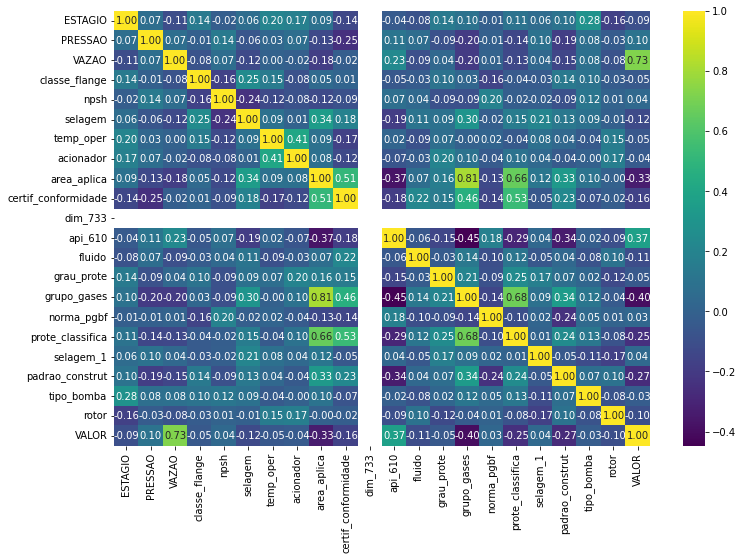

In [82]:
sns.heatmap(data.corr(), annot=True, cmap="viridis", fmt="0.2f");

*Analise de: Pressão x Valor*

Text(0, 0.5, 'VALOR')

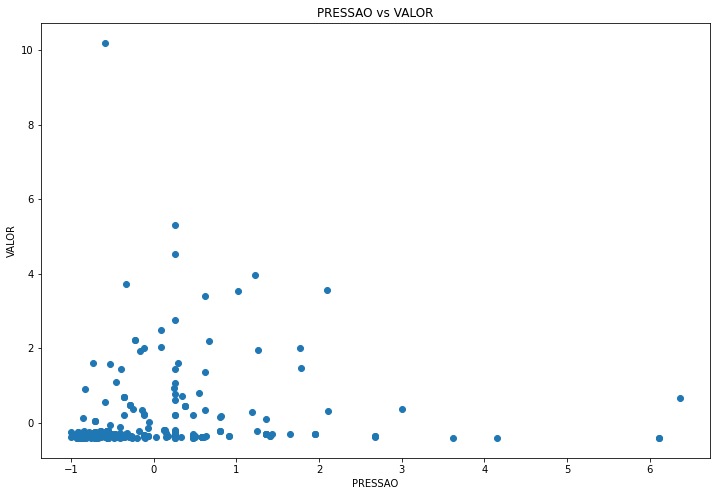

In [83]:
X = data['PRESSAO']
y = data['VALOR']
plt.scatter(x=X, y=y)
plt.title('PRESSAO vs VALOR')
plt.xlabel('PRESSAO')
plt.ylabel('VALOR')

*Analise de: Vazão x Valor*

Text(0, 0.5, 'VALOR')

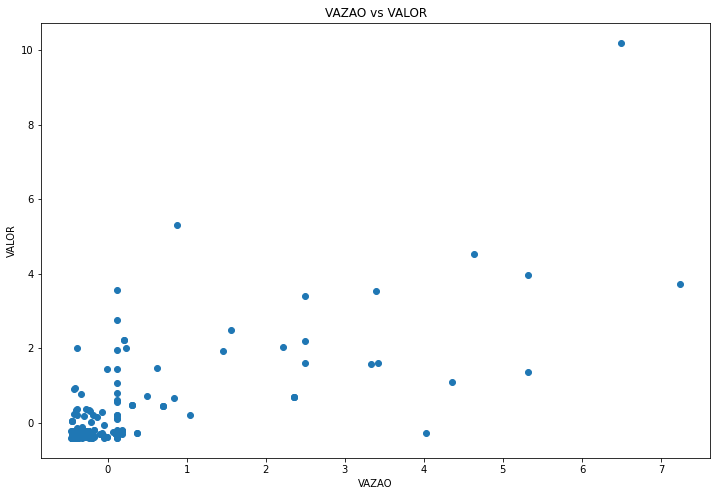

In [84]:
X = data['VAZAO']
y = data['VALOR']
plt.scatter(x=X, y=y)
plt.title('VAZAO vs VALOR')
plt.xlabel('VAZAO')
plt.ylabel('VALOR')

### <font color='green'>Modelo 1</font>

*Sumário do modelo*

In [85]:
data1 = data
X = sm.add_constant(data1.drop('VALOR', axis=1))
y = data1['VALOR']
X.sample(5)

const   ESTAGIO   PRESSAO  ...  padrao_construt  tipo_bomba     rotor
250    1.0 -0.399334 -0.551347  ...           0.3046   -0.831819  1.983968
177    1.0 -0.399334  2.681237  ...           0.3046   -0.831819  1.983968
313    1.0 -0.399334 -0.560187  ...           0.3046   -0.831819 -0.665684
283    1.0 -0.399334 -0.722258  ...           0.3046    1.194567 -0.135754
240    1.0 -0.399334 -0.551347  ...           0.3046   -0.831819  1.983968

[5 rows x 22 columns]

In [86]:
model1 = sm.OLS(y, X.astype(float)).fit()

In [87]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     26.04
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           4.01e-54
Time:                        01:02:39   Log-Likelihood:                -297.70
No. Observations:                 324   AIC:                             637.4
Df Residuals:                     303   BIC:                             716.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.816e-17    

*Gráfico qq*

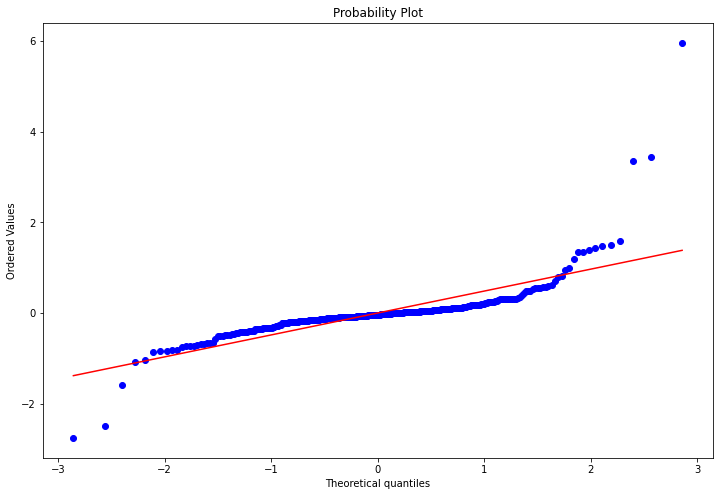

In [88]:
graph_plotter = graphs.AssumptionGraphs(model1)
graph_plotter.plot_qq()

*Gráfico de resíduos x ajustados*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


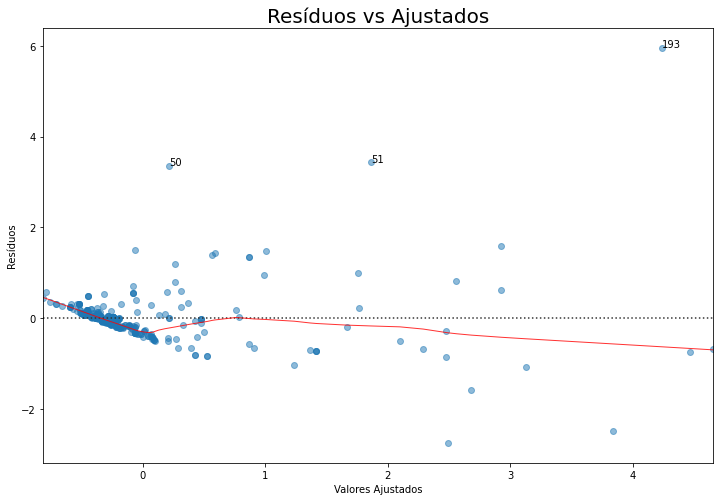

In [89]:
graph_plotter.plot_residual_fitted_values(y)

*Gráfico de resíduos padronizados*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


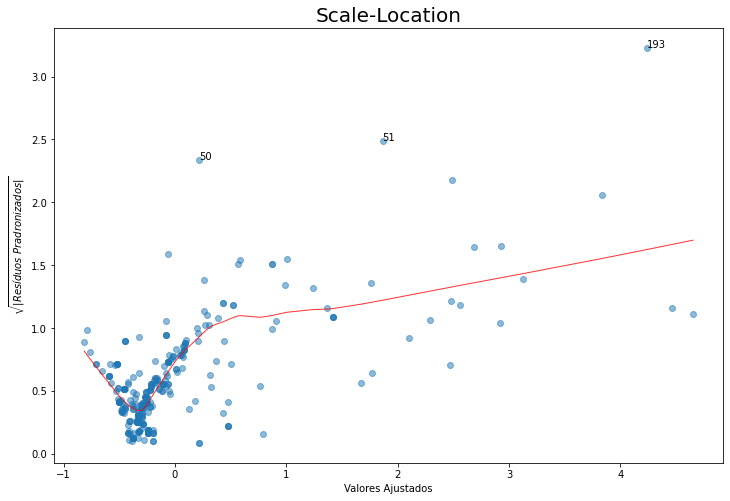

In [90]:
graph_plotter.plot_scale_location()

*Gráfico de outlier*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


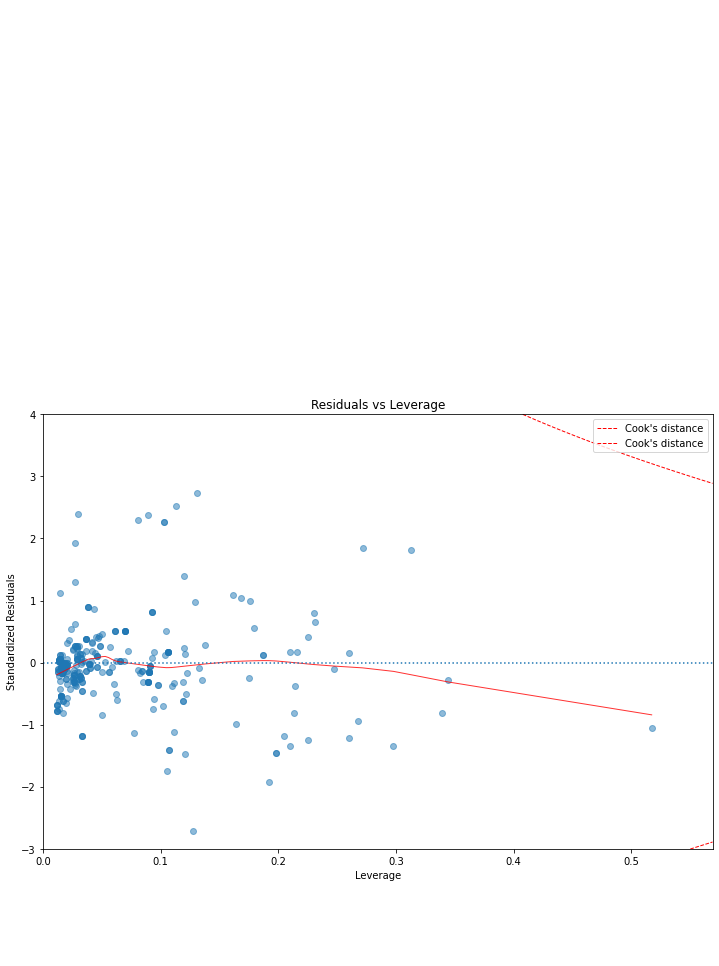

In [91]:
graph_plotter.plot_influence()

*Fator de inflação da variância*

In [92]:
pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const                  1.000000
ESTAGIO                1.302063
PRESSAO                1.186812
VAZAO                  1.165316
classe_flange          1.226248
npsh                   1.189363
selagem                1.387233
temp_oper              1.418870
acionador              1.412527
area_aplica            3.744495
certif_conformidade    1.924860
dim_733                     NaN
api_610                1.407201
fluido                 1.161994
grau_prote             1.225848
grupo_gases            3.750412
norma_pgbf             1.180392
prote_classifica       2.390232
selagem_1              1.232660
padrao_construt        1.334141
tipo_bomba             1.268501
rotor                  1.204408
dtype: float64

*Gráfico de regressão parcial ou de variável agregada*

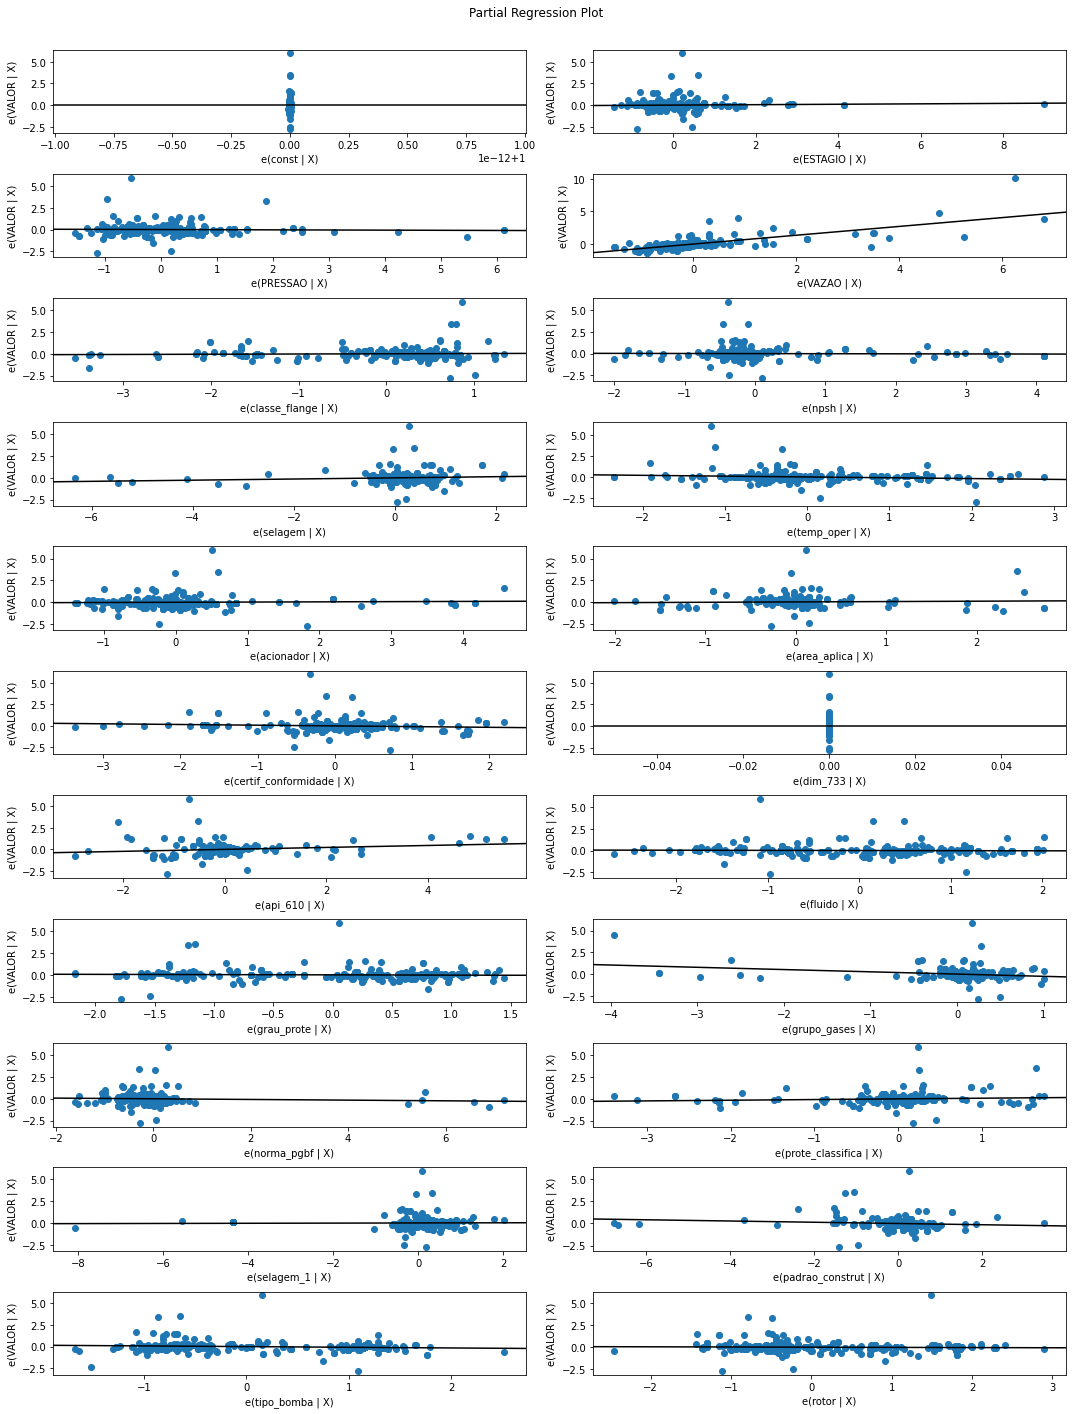

In [93]:
fig = plt.figure(figsize=(15, 20))
sm.graphics.plot_partregress_grid(model1, fig=fig);

<font color='green'>Analisando o resultado da regressão observa-se pelo R2 ajustado que 60% da variável dependente é explicada pelas demais variáveis do modelo. O p-valor individual indica que os atributos 'VAZAO', 'temp_oper', 'api_610', 'grupo_gases' e 'tipo_bomba' são significantes para o modelo pois são inferiores a 0,05, o que rejeita a hipótese nula.

<font color='green'>Por esse motivo o modelo otimizado contará com apenas as das variáveis relevantes.

### <font color='green'>Modelo 1 - Otimizado</font>

*Carregando o modelo*

In [94]:
data1_o = pd.DataFrame(data,columns=['VAZAO', 'api_610', 'grupo_gases', 'VALOR'])

*Sumário do modelo*

In [95]:
X = sm.add_constant(data1_o.drop('VALOR', axis=1))
y = data1_o['VALOR']
X.sample(5)

const     VAZAO   api_610  grupo_gases
140    1.0 -0.330503 -0.254859     0.349475
162    1.0 -0.433154 -0.254859     0.349475
112    1.0 -0.202189 -0.254859     0.349475
127    1.0 -0.394660 -0.254859     0.349475
171    1.0 -0.330503 -0.254859     0.349475

In [96]:
model1_o = sm.OLS(y, X.astype(float)).fit()

In [97]:
print(model1_o.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.17e-64
Time:                        01:02:45   Log-Likelihood:                -308.24
No. Observations:                 324   AIC:                             624.5
Df Residuals:                     320   BIC:                             639.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.816e-17      0.035   1.09e-15      

### <font color='green'>Modelo 2</font>

*Carregando o modelo*

In [98]:
data2 = data
X = sm.add_constant(data2.drop('VALOR', axis=1))
y = data2['VALOR']
X.sample(5)
model2 = sm.OLS(y, X.astype(float)).fit()
from sklearn.model_selection import train_test_split 

*Fazendo a separação do modelo*

In [99]:
X = data2.loc[:,data2.columns != 'VALOR']  # Entrada
y = data2.VALOR    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Treino e teste

*Treinando o modelo*

In [100]:
from sklearn.linear_model import LinearRegression
def train_and_predict(X_train, y_train, X_test):
  model2 = LinearRegression(normalize=True)
  model2.fit(X_train, y_train);
  y_pred = model2.predict(X_test) #inferência do teste
  return model2, y_pred
model2, y_pred = train_and_predict(X_train, y_train, X_test)

In [101]:
def evaluate(y_test, y_pred, X_test):  
  # R2
  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)
  n = len(y_test)
  p = X_test.shape[1]
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  print('R2 ajustado: ', adj_r2)
evaluate(y_test, y_pred, X_test)

R2:  0.49084506088075186
R2 ajustado:  0.24218799758995624


*Equação de R ajustado*

In [102]:
model2.intercept_

-0.040179176239211814

In [103]:
model2.coef_

array([ 1.52702890e-02,  1.90387835e-02,  5.00617714e-01, -2.54966149e-03,
       -6.89800041e-03,  4.28203483e-02, -5.10838256e-02,  2.56654854e-02,
       -7.89296855e-02, -3.54638001e-02,  1.11022302e-15,  1.75027963e-01,
        1.44938812e-02, -9.73699354e-03, -7.76387559e-02, -5.34697073e-02,
       -2.93400876e-02,  1.93051959e-02, -6.83954185e-02, -7.45146460e-02,
       -4.94746196e-02])

In [104]:
data2.head()

ESTAGIO   PRESSAO     VAZAO  ...  tipo_bomba     rotor     VALOR
0 -0.399334 -0.069553 -0.429946  ...   -0.831819 -0.665684 -0.367050
1 -0.399334 -0.069553 -0.429946  ...   -0.831819 -0.665684 -0.367050
2  9.167798  0.176500 -0.349750  ...    1.194567  0.924107 -0.357797
3 -0.399334 -0.648590 -0.349750  ...    1.194567 -0.135754 -0.295043
4 -0.399334 -0.781193 -0.330503  ...   -0.831819 -0.135754 -0.311127

[5 rows x 22 columns]

*Previsto x realizado*

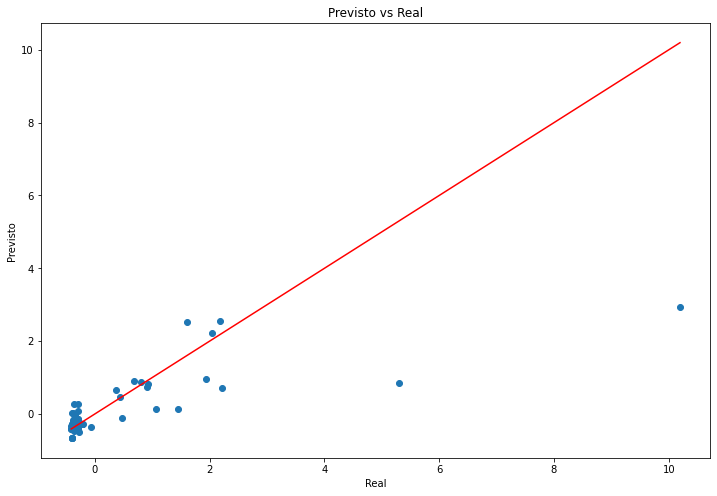

In [105]:
plt.scatter(x=y_test, y=y_pred)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, color='red'); #reta onde y=x

*Carregando o modelo*

### <font color='green'>Modelo 2 - Otimizado</font>

*Carregando o modelo*

In [106]:
data2_o = pd.DataFrame(data,columns=['VAZAO', 'api_610', 'grupo_gases', 'VALOR'])
X = sm.add_constant(data2_o.drop('VALOR', axis=1))
y = data2_o['VALOR']
X.sample(5)
model2_o = sm.OLS(y, X.astype(float)).fit()
from sklearn.model_selection import train_test_split 

*Fazendo a separação do modelo*

In [107]:
X = data2_o.loc[:,data2_o.columns != 'VALOR']  # Entrada
y = data2_o.VALOR    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Treino e teste

*Treinando o modelo*

In [108]:
from sklearn.linear_model import LinearRegression
def train_and_predict(X_train, y_train, X_test):
  model2_o = LinearRegression(normalize=True)
  model2_o.fit(X_train, y_train);
  y_pred = model2_o.predict(X_test) #inferência do teste
  return model2_o, y_pred
model2_o, y_pred = train_and_predict(X_train, y_train, X_test)

In [109]:
def evaluate(y_test, y_pred, X_test):  
  # R2
  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)
  n = len(y_test)
  p = X_test.shape[1]
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  print('R2 ajustado: ', adj_r2)
evaluate(y_test, y_pred, X_test)

R2:  0.14383274973825
R2 ajustado:  0.10172616365980325


*Equação de R ajustado*

In [110]:
model2_o.intercept_

0.03397865446672926

In [111]:
model2_o.coef_

array([ 0.68646606,  0.07476736, -0.29551956])

In [112]:
data2_o.head()

VAZAO   api_610  grupo_gases     VALOR
0 -0.429946 -0.254859     0.349475 -0.367050
1 -0.429946 -0.254859     0.349475 -0.367050
2 -0.349750 -0.254859     0.349475 -0.357797
3 -0.349750 -0.254859     0.349475 -0.295043
4 -0.330503 -0.254859     0.349475 -0.311127

*Previsto x realizado*

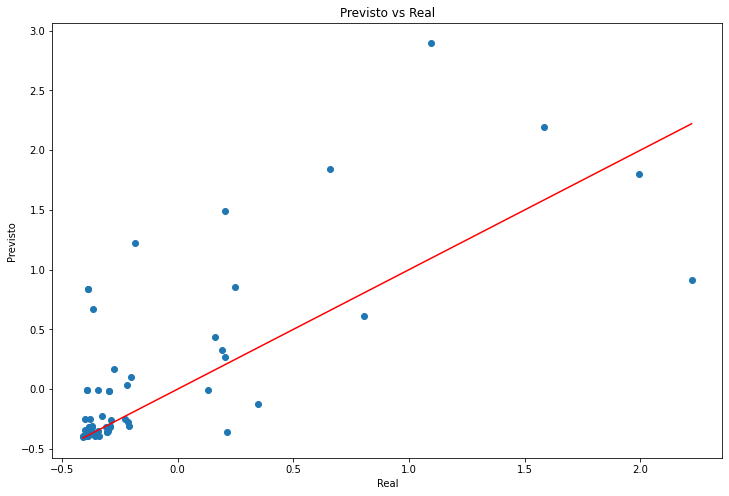

In [113]:
plt.scatter(x=y_test, y=y_pred)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, color='red'); #reta onde y=x

## <font color='blue'>Modelo de regressão múltipla polinomial</font>
===================================================================================================================

### <font color='green'>Modelo 3</font>

*Carregando o modelo*

In [114]:
data3 = pd.DataFrame(data,columns=['VAZAO', 'api_610', 'grupo_gases', 'VALOR'])

*Polinomial de 2ª ordem*

In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polynomial_features = PolynomialFeatures(degree=2)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(324, 10)

In [116]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     65.67
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           6.60e-67
Time:                        01:02:46   Log-Likelihood:                -288.24
No. Observations:                 324   AIC:                             596.5
Df Residuals:                     314   BIC:                             634.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0060      0.055     -0.109      0.9

*Polinomial de 3ª ordem*

In [117]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(324, 20)

In [118]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     35.79
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           4.87e-66
Time:                        01:02:46   Log-Likelihood:                -269.44
No. Observations:                 324   AIC:                             578.9
Df Residuals:                     304   BIC:                             654.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.119      0.093      0.9

In [119]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=4)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(324, 35)

In [120]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     27.47
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.72e-71
Time:                        01:02:46   Log-Likelihood:                -226.02
No. Observations:                 324   AIC:                             522.0
Df Residuals:                     289   BIC:                             654.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2351      0.268      0.876      0.3

In [121]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=5)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(324, 56)

In [122]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     48.47
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          1.26e-109
Time:                        01:02:46   Log-Likelihood:                -85.290
No. Observations:                 324   AIC:                             274.6
Df Residuals:                     272   BIC:                             471.2
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4865      4.669     -0.533      0.5

In [123]:
import altair as alt

x = y_test
y = y_pred
source = pd.DataFrame({"x": x, "y": y})

degree_list = [1, 2, 3, 4, 5]

base = alt.Chart(source).mark_circle(color="black").encode(
        alt.X("x"), alt.Y("y")
)

polynomial_fit = [
    base.transform_regression(
        "x", "y", method="poly", order=order, as_=["x", str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=["degree", "y"])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

alt.layer(base, *polynomial_fit)

alt.LayerChart(...)